In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGxRzqCpzCJT-NQa7W-s8jUa8zpj3vOLbjiov4apsY14nwSGiG1yaM
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns 
#Reading csv file
url = "http://bit.ly/w-data"
score_data=pd.read_csv(url)


#creating copy
sd=score_data.copy()


# structure of dataset
sd.info()
print(sd)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


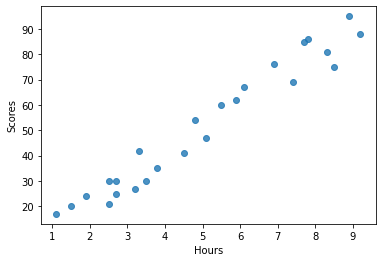

Mean Squared Error-   4.7921912746363144
Residuals -  [ 2.94633459 -6.69422878 -5.80620886  3.1577679   1.87664117 -4.56736879
  3.03090791  7.27836446]
No of Hours = [9.25]
Predicted Score = 92.91505723477056


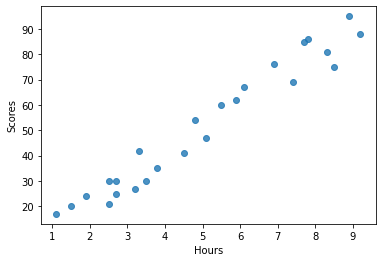

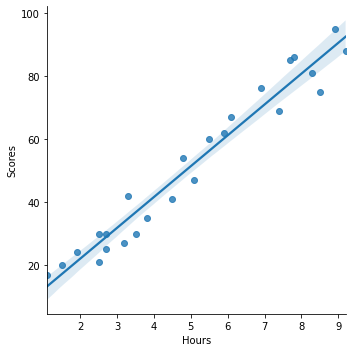

In [5]:
#removing duplicate records sd.drop_duplicate(keep='first',inplace=true)

#Data cleaning
sd=sd.dropna(axis=0)


#plotting
sns.regplot(x='Hours',y='Scores',scatter=True,fit_reg=False,data =sd)

#importing Necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Model Building

#seperating input and output features
x1=sd.iloc[:, :-1].values 
y1=sd.iloc[:, 1].values


#splitting data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=.3,random_state=0)


#Linear Regression
lgr=LinearRegression(fit_intercept=True)
model_lin1=lgr.fit(X_train,Y_train)
prediction=lgr.predict(X_test)

#Comuting MSE (Model Evaluation)
mse1=mean_squared_error(Y_test,prediction)
rmse=np.sqrt(mse1)
print("Mean Squared Error-  ",rmse)

#Regression Dignostics
residuals=Y_test-prediction
print("Residuals - ",residuals)

#print the prediction
Hours=[[9.25],[9.26]]
pred=lgr.predict(Hours)
print("No of Hours = {}".format(Hours[0]))
print("Predicted Score = {}".format(pred[0]))


#plotting
sns.lmplot(x="Hours",y="Scores",data=sd)